In [39]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('Irisold.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['Species'] = encoder.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

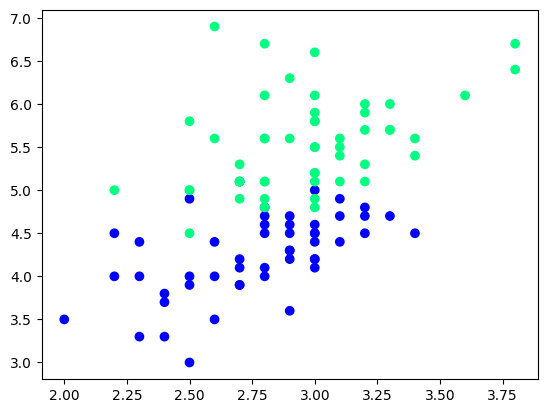

In [16]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')
plt.show()

In [17]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
50,3.2,4.7,1
77,3.0,5.0,1
66,3.0,4.5,1
107,2.9,6.3,2
88,3.0,4.1,1
72,2.5,4.9,1
108,2.5,5.8,2
89,2.5,4.0,1
75,3.0,4.4,1


In [18]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [19]:
df_train

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
78,2.9,4.5,1
138,3.0,4.8,2
56,3.3,4.7,1
149,3.0,5.1,2
116,3.0,5.5,2
105,3.0,6.6,2
107,2.9,6.3,2
82,2.7,3.9,1
102,3.0,5.9,2


In [20]:
df_val

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
93,2.3,3.3,1
147,3.0,5.2,2
99,2.8,4.1,1
96,2.9,4.2,1


In [21]:
df_test

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
124,3.3,5.7,2
60,2.0,3.5,1
97,2.9,4.3,1
136,3.4,5.6,2


In [22]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [23]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging

In [24]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
149,3.0,5.1,2
138,3.0,4.8,2
102,3.0,5.9,2
138,3.0,4.8,2
56,3.3,4.7,1
56,3.3,4.7,1
78,2.9,4.5,1


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [26]:
dt_bag1 = DecisionTreeClassifier()

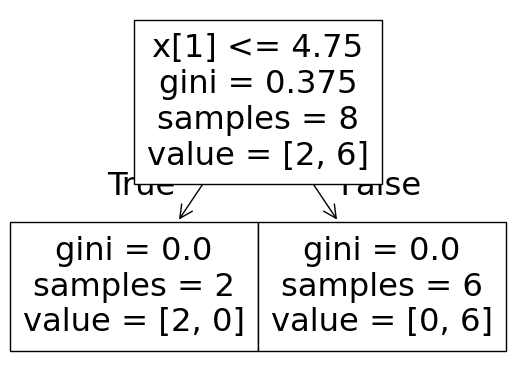

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


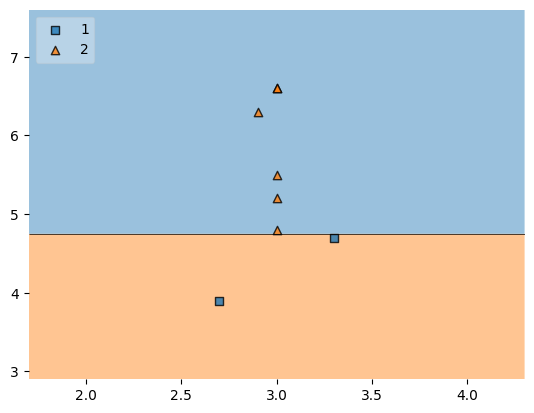

In [31]:
evaluate(dt_bag1,X,y)

In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
82,2.7,3.9,1
116,3.0,5.5,2
78,2.9,4.5,1
138,3.0,4.8,2
145,3.0,5.2,2
107,2.9,6.3,2
145,3.0,5.2,2


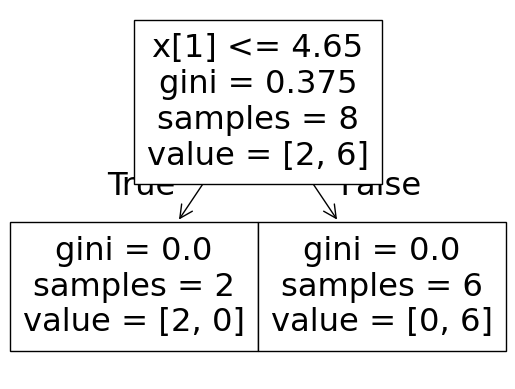

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


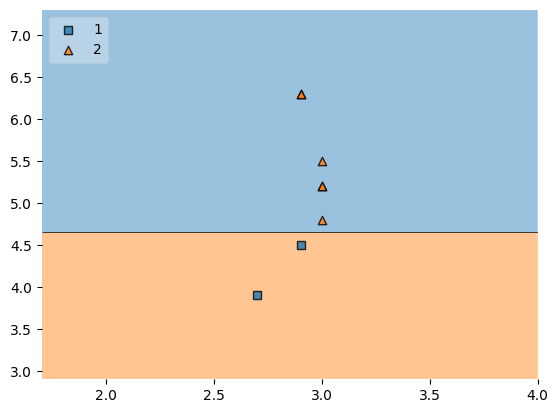

In [33]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [34]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
56,3.3,4.7,1
82,2.7,3.9,1
145,3.0,5.2,2
116,3.0,5.5,2
116,3.0,5.5,2
149,3.0,5.1,2
102,3.0,5.9,2


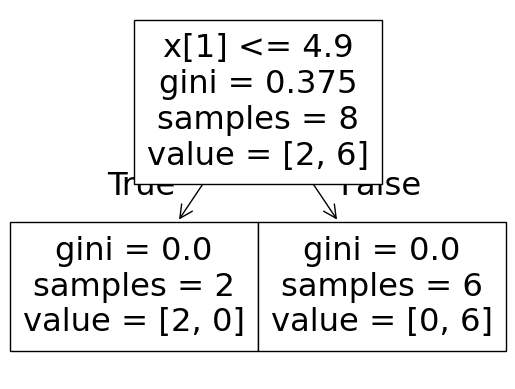

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


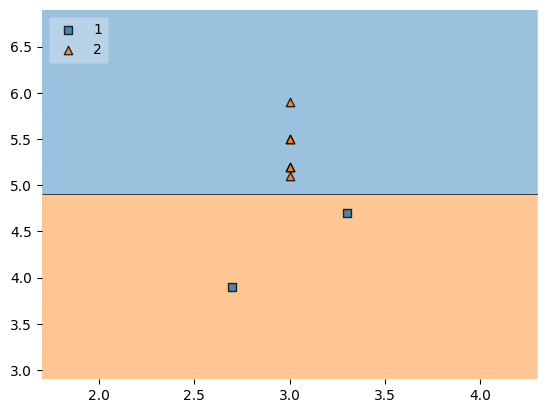

In [35]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [36]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [37]:
df_test

,SepalWidthCm,PetalLengthCm,Species
123,2.7,4.9,2
124,3.3,5.7,2
60,2.0,3.5,1
97,2.9,4.3,1
136,3.4,5.6,2


In [40]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [41]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
78,2.9,4.5,1
138,3.0,4.8,2
56,3.3,4.7,1
149,3.0,5.1,2
116,3.0,5.5,2
105,3.0,6.6,2
107,2.9,6.3,2
82,2.7,3.9,1
102,3.0,5.9,2


In [42]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
116,3.0,5.5,2
149,3.0,5.1,2
78,2.9,4.5,1
56,3.3,4.7,1
105,3.0,6.6,2
107,2.9,6.3,2
82,2.7,3.9,1
145,3.0,5.2,2


# Random Subspaces

In [44]:
df1 = pd.read_csv('Irisold.csv')
df1 = df1.sample(10)

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [66]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Species
134,2.6,Iris-virginica
12,3.0,Iris-setosa
13,3.0,Iris-setosa
146,2.5,Iris-virginica
38,3.0,Iris-setosa
62,2.2,Iris-versicolor
77,3.0,Iris-versicolor
45,3.0,Iris-setosa
109,3.6,Iris-virginica
10,3.7,Iris-setosa


# Random Patches

In [67]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [69]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
38,4.4,39
10,5.4,11
109,7.2,110
62,6.0,63
134,6.1,135
12,4.8,13
10,5.4,11
134,6.1,135
